In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns

## **1. The number of Infographics crawled from each news outlet**

In [ ]:
with open('/content/drive/MyDrive/VQAdata/data.json', 'r', encoding='utf-8') as f:
  data = json.load(f)

dct = {}
for key in data.keys():
  a = key.split('_')[0]
  if a in dct.keys():
    dct[a] += 1
  else:
    dct[a] = 1

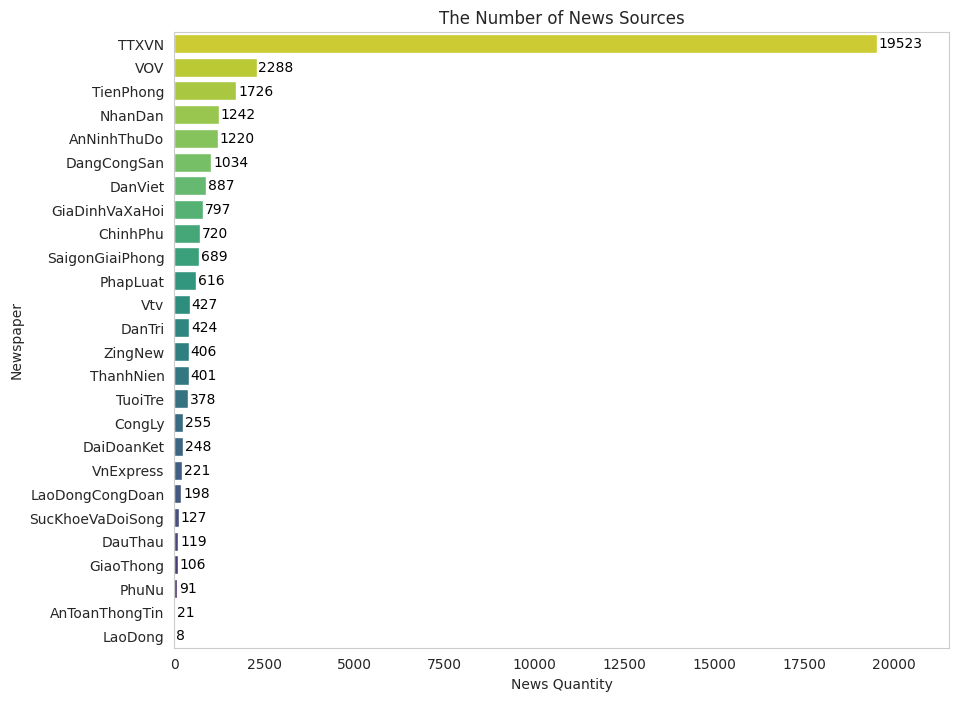

In [ ]:
def plot_chart(data: dict[str, int]):
    dct_sort = dict(sorted(dct.items(), key=lambda item: item[1], reverse=True))
    names = list(dct_sort.keys())
    values = list(dct_sort.values())

    plt.figure(figsize=(10, 8))
    ax = sns.barplot(x=values, y=names, legend=False, hue=names, palette='viridis_r')
    plt.xlim(0, max(values) + 2000)  # Increase the upper limit slightly
    plt.grid(False)

    for index, value in enumerate(values):
        ax.text(value + 50, index, str(value), va='center', color='black')

    plt.ylabel('Newspaper')
    plt.xlabel('News Quantity')
    plt.title('The Number of News Sources')

    plt.savefig("/content/drive/MyDrive/VQAdata/NewsSource.png", dpi=300, bbox_inches="tight")
    plt.show()


plot_chart(dct)

## **2. Question and Answer Lengths' Distribution**

In [ ]:
with open('/content/drive/MyDrive/VQAdata/train.json', 'r', encoding = 'utf-8') as f:
    data_train = json.load(f)
with open('/content/drive/MyDrive/VQAdata/val.json', 'r', encoding = 'utf-8') as f:
    data_val = json.load(f)
with open('/content/drive/MyDrive/VQAdata/test.json', 'r', encoding = 'utf-8') as f:
    data_test = json.load(f)


In [ ]:
def analyze(train: dict[str, dict[str, str]], val: dict[str, dict[str, str]], test: dict[str, dict[str, str]]):
    length_train_ques = []
    length_train_ans = []
    length_val_ques = []
    length_val_ans = []
    length_test_ques = []
    length_test_ans = []

    for name, lst in train.items():
        for item in lst:
            if len(item['Answer'].split()) < 2:
                continue
            length_train_ques.append(len(item['Question'].split()))
            length_train_ans.append(len(item['Answer'].split()))

    for name, lst in val.items():
        for item in lst:
            length_val_ques.append(len(item['Question'].split()))
            length_val_ans.append(len(item['Answer'].split()))

    for name, lst in test.items():
        for item in lst:
            length_test_ques.append(len(item['Question'].split()))
            length_test_ans.append(len(item['Answer'].split()))

    datasets = [
        ("Train Set", length_train_ques, length_train_ans),
        ("Validation Set", length_val_ques, length_val_ans),
        ("Test Set", length_test_ques, length_test_ans)
    ]
    return datasets

datasets = analyze(data_train, data_val, data_test)

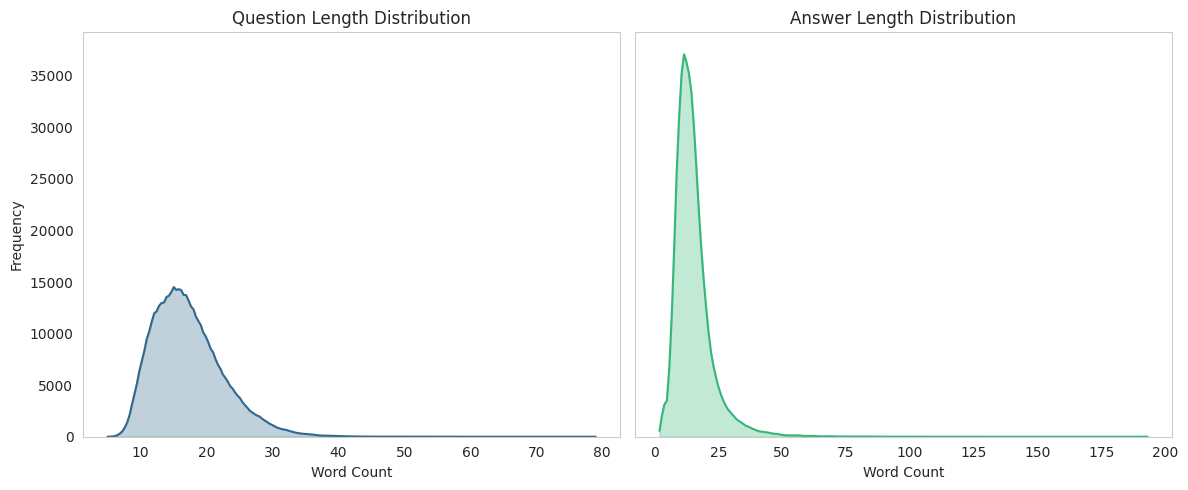

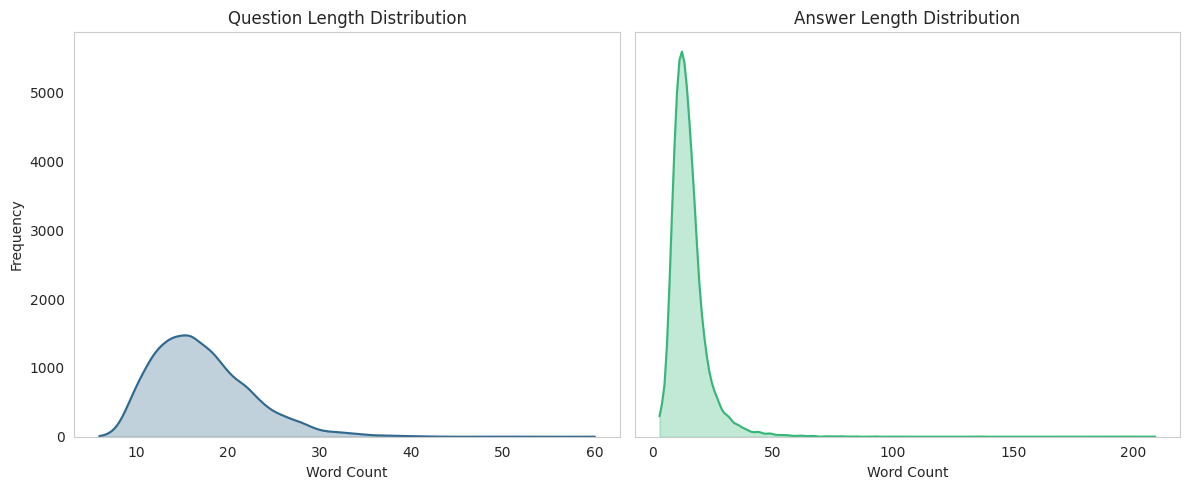

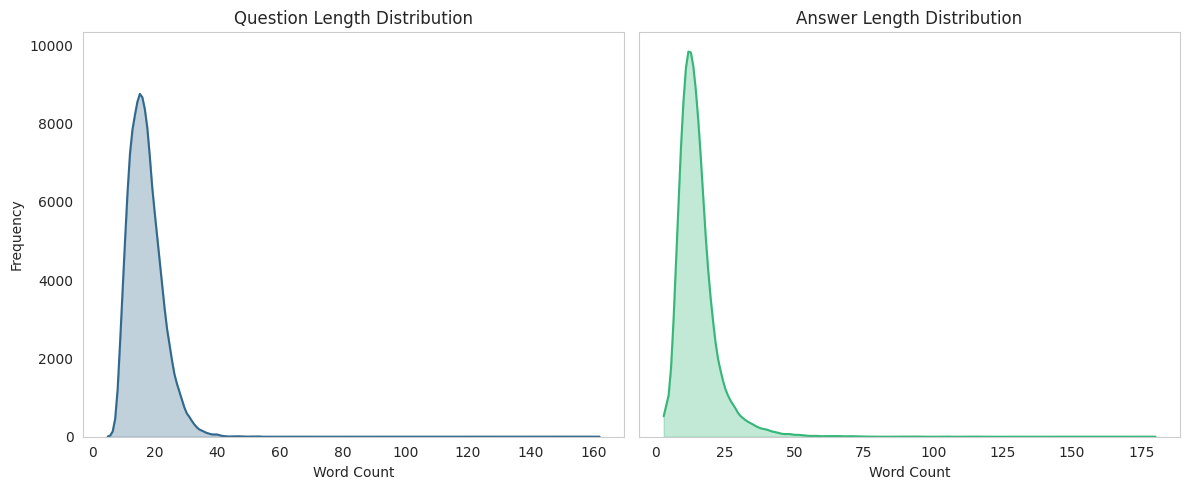

In [ ]:
def plot_histogram(datasets):
    sns.set_style("whitegrid")

    # Extract Train Set Only
    c1, c2 = sns.color_palette("viridis", 2)

    for name, length_train_ques, length_train_ans in datasets:
        fig, axes = plt.subplots(1, 2, figsize = (12, 5), sharey = True)
        # Histogram for Question Lengths
        hist = sns.histplot(length_train_ques, bins = 50, kde = True, color = c1, alpha = 0, ax = axes[0], fill = True)
        kde_line = hist.lines[0]  # Get KDE line
        x_data = kde_line.get_xdata()
        y_data = kde_line.get_ydata()
        axes[0].fill_between(x_data, y_data, color = c1, alpha = 0.3)
        axes[0].set_title("Question Length Distribution")
        axes[0].set_xlabel("Word Count")
        axes[0].set_ylabel("Frequency")
        axes[0].grid(False)

        # Histogram for Answer Lengths
        hist = sns.histplot(length_train_ans, bins = 50, kde = True, color = c2, alpha = 0, ax = axes[1])
        kde_line = hist.lines[0]  # Get KDE line
        x_data = kde_line.get_xdata()
        y_data = kde_line.get_ydata()
        axes[1].fill_between(x_data, y_data, color = c2, alpha = 0.3)
        axes[1].set_title("Answer Length Distribution")
        axes[1].set_xlabel("Word Count")
        axes[1].grid(False)

        # Super title for the entire figure
        # fig.suptitle(f"{name} - Question and Answer Lengths", fontsize=14)

        # Adjust layout
        plt.tight_layout()
        plt.savefig(f"/content/drive/MyDrive/VQAdata/{name} Dist.png", dpi = 300, bbox_inches = "tight")
        plt.show()

# Example usage:
plot_histogram(datasets)

## **3. Statistic of images and QAs**

In [1]:
import os
import json

numInfoTrain = len(os.listdir("../../../../Datasets/train"))
numInfoVal = len(os.listdir("../../../../Datasets/val"))
numInfoTest = len(os.listdir("../../../../Datasets/test"))

print(f"Number of infographics in training set: {numInfoTrain}")
print(f"Number of infographics in validation set: {numInfoVal}")
print(f"Number of infographics in testing set: {numInfoTest}")

# Đọc dữ liệu từ file data.json
with open('../../../../Datasets/train/train.json', 'r', encoding = 'utf-8') as file:
    train_data = json.load(file)
    
with open('../../../../Datasets/val/val.json', 'r', encoding = 'utf-8') as file:
    val_data = json.load(file)
    
with open('../../../../Datasets/test/test.json', 'r', encoding = 'utf-8') as file:
    test_data = json.load(file)

numTrain_TextQAs = 0
numTrain_NonTextQAs = 0
numVal_TextQAs = 0
numVal_NonTextQAs = 0
numTest_TextQAs = 0
numTest_NonTextQAs = 0

for record in train_data:
    if record["type"].lower() == "text":
        numTrain_TextQAs += 1
    elif (record["type"].lower() == "non-text"):
        numTrain_NonTextQAs += 1
    else:
        print(record)
        
for record in val_data:
    if record["type"].lower() == "text":
        numVal_TextQAs += 1
    elif (record["type"].lower() == "non-text"):
        numVal_NonTextQAs += 1
    else:
        print(record)
        
for record in test_data:
    if record["type"].lower() == "text":
        numTest_TextQAs += 1
    elif (record["type"].lower() == "non-text"):
        numTest_NonTextQAs += 1
    else:
        print(record)

print()
print(f"Number of Text QAs in training set: {numTrain_TextQAs}")
print(f"Number of Non-Text QAs in training set: {numTrain_NonTextQAs}")
print(f"Number of Text QAs in validation set: {numVal_TextQAs}")
print(f"Number of Non-Text QAs in validation set: {numVal_NonTextQAs}")
print(f"Number of Text QAs in testing set: {numTest_TextQAs}")
print(f"Number of Non-Text QAs in testing set: {numTest_NonTextQAs}")

Number of infographics in training set: 23895
Number of infographics in validation set: 3404
Number of infographics in testing set: 6876

Number of Text QAs in training set: 60060
Number of Non-Text QAs in training set: 37246
Number of Text QAs in validation set: 8582
Number of Non-Text QAs in validation set: 5308
Number of Text QAs in testing set: 17324
Number of Non-Text QAs in testing set: 10677
